In [107]:
import pandas as pd
import numpy as np 
from ast import literal_eval
df = pd.read_csv('./randomly.csv')
df.head(3)

,Course System No.,Section,Selected Student No.,The No. of applicants,Limited class size
0,10.009,A,20200019,23,20
1,10.009,A,20200315,23,20
2,10.009,A,20200323,23,20


In [108]:
df1 = df.groupby(by=["Course System No.", 'Section','The No. of applicants']).count()['Selected Student No.'].reset_index(name='real class size')
df1['rate'] = df1['The No. of applicants'] / df1['real class size']
df1 = df1.sort_values(by=['rate'], ascending=False)

df1.head(10)

,Course System No.,Section,The No. of applicants,real class size,rate
29,10.052,A,396,30,13.200000
30,10.052,B,369,30,12.300000
31,10.052,C,364,30,12.133333
52,10.156,A,252,30,8.400000
194,46.703,,27,5,5.400000
26,10.051,A,144,30,4.800000
28,10.051,C,143,30,4.766667
8,10.022,A,92,20,4.600000
102,11.5,U,89,20,4.450000
185,36.489,,171,40,4.275000


In [109]:
df2 = df.groupby(["Selected Student No."]).size().reset_index(name='course_num')
df2 = df2.sort_values(by=['course_num'], ascending=False)
df3 = df2.groupby(["course_num"]).size().reset_index(name='total_num')
df3

,course_num,total_num
0,1,1606
1,2,944
2,3,687
3,4,391
4,5,164
5,6,64
6,7,17
7,8,2


<AxesSubplot:ylabel='total_num'>

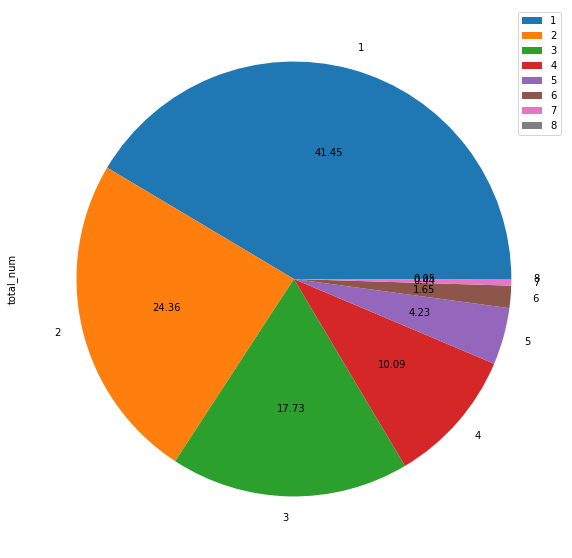

In [110]:
df3.plot.pie(x='course_num', y='total_num', autopct="%.2f", labels = [i + 1 for i in range(8)], figsize = (10,10))

In [111]:
health = ['10.039', '10.050', '10.051', '10.052', '13.053']
df4 = df.loc[df['Course System No.'].isin(health)]
df4.loc[:,['grade']] = (df4['Selected Student No.'] / 10000).astype(int)

df5 = df4.groupby(["grade"]).size().reset_index(name='total_num')
df5 = df5.sort_values(by=['grade'], ascending=False)
df5

C:\Users\dbtmd\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,grade,total_num
9,2021,40
8,2020,58
7,2019,56
6,2018,53
5,2017,51
4,2016,21
3,2015,17
2,2014,2
1,2013,1
0,2012,1
